# Uso de la API Covid con Pandas - AD4 
## Lina Vargas Vega 
<br>
Máster periodismo digital y de datos 
<br>

Mi url https://api.covid19api.com/countries

## Instalar librerías 
Es probable que al descargar Anaconda la libería Pandas ya estuviera incluida, así que este paso sirve para llamarla a funcionar en el documento actual. Se puede llamar con la función !pip o !conda -si se descargó Jupyter desde Anaconda-.

In [1]:
!pip install pandas

## Configurar Panda 
Con esta indicación podremos referinos a Pandas como pd en todo el documento 

In [2]:
import pandas as pd 

## Traer la API Covid al documento 
Para que Pandas identifique los datos que vamos a tratar, vamos a crear una variable denominada 'miurl' que representará el link de la API 

In [3]:
miurl = "https://api.covid19api.com/countries"

Hacemos una pequeña prueba para comprobar que nuestra variable funcione 

In [4]:
miurl

'https://api.covid19api.com/countries'

## Crear de dataframe 
Un dataframe (df) es literalmente un marco de datos y servirá para encerrar, organizar y eventualmente ilustrar nuestra información. La función read_json() servirá para que se identifique el formato json que es el que tienen los datos de la API, de ahora en adelante miurl.

In [18]:
df = pd.read_json (miurl)

Corremos una pequeña prueba para comprobar que todo salió correcto. Al traer df a Pandas, se muestra el conjunto de datos entero.

In [19]:
df

,Country,Slug,ISO2
0,Denmark,denmark,DK
1,Greece,greece,GR
2,Oman,oman,OM
3,Poland,poland,PL
4,Botswana,botswana,BW
...,...,...,...
243,Liechtenstein,liechtenstein,LI
244,Slovakia,slovakia,SK
245,Tajikistan,tajikistan,TJ
246,Argentina,argentina,AR


También podemos crear un dataframe con los primeros datos de la lista. En este caso, los primeros 10... 

In [20]:
df.head(10)

,Country,Slug,ISO2
0,Denmark,denmark,DK
1,Greece,greece,GR
2,Oman,oman,OM
3,Poland,poland,PL
4,Botswana,botswana,BW
5,Cambodia,cambodia,KH
6,Tonga,tonga,TO
7,Cook Islands,cook-islands,CK
8,Kenya,kenya,KE
9,Holy See (Vatican City State),holy-see-vatican-city-state,VA


... O los últimos 10 

In [22]:
df.tail(10)

,Country,Slug,ISO2
238,Swaziland,swaziland,SZ
239,Turks and Caicos Islands,turks-and-caicos-islands,TC
240,Angola,angola,AO
241,Uruguay,uruguay,UY
242,Japan,japan,JP
243,Liechtenstein,liechtenstein,LI
244,Slovakia,slovakia,SK
245,Tajikistan,tajikistan,TJ
246,Argentina,argentina,AR
247,Jamaica,jamaica,JM


Un paso importante es usar la función info que nos permite saber si hay algún dato nulo o que no corresponda al resto. También nos mostrará el nombre de las colunmas para usarlo más adelante.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  248 non-null    object
 1   Slug     248 non-null    object
 2   ISO2     248 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


Ahora que conocemos el nombre de la columna de la lista de países (Country, teniendo en cuenta la mayúscula) podemos crear un df con esta información

In [15]:
df['Country']

0             Angola
1            Georgia
2            Ireland
3           Slovenia
4      French Guiana
           ...      
243        Sri Lanka
244           Canada
245           Kuwait
246            Libya
247       Seychelles
Name: Country, Length: 248, dtype: object

Incluso, podríamos hacer un df de un solo dato si lo quisieramos. 

In [17]:
df['Country'][66]

'Palau'

## Tiempo real 
Ahora vamos a poner a prueba lo que hemos practicado. Vamos a tomar la url que indica el sitio web de la API Covid para la información por país en tiempo real, y vamos a crear una variable para identificarla como la url de Colombia. También le pediremos a Pandas que lea los datos de la url_col que están en formato json.  

In [25]:
url_col = 'https://api.covid19api.com/country/Colombia/status/confirmed/live'
df_col = pd.read_json (url_col)
df_col

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-22 00:00:00+00:00
1,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-23 00:00:00+00:00
2,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-24 00:00:00+00:00
3,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-25 00:00:00+00:00
4,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
1038,Colombia,CO,,,,4.57,-74.3,6312657,confirmed,2022-11-25 00:00:00+00:00
1039,Colombia,CO,,,,4.57,-74.3,6312657,confirmed,2022-11-26 00:00:00+00:00
1040,Colombia,CO,,,,4.57,-74.3,6312657,confirmed,2022-11-27 00:00:00+00:00
1041,Colombia,CO,,,,4.57,-74.3,6312657,confirmed,2022-11-28 00:00:00+00:00


## Explorar los datos 
Cómo lo hicimos antes, podemos ver diferentes ángulos del df general de Colombia para familiarizarnos más con la información.

Es importante tener a la mano el nombre de las columnas de nuestro df para identificar aquellas que nos servirán en la visualización del gráfico final. 

In [26]:
df_col.columns

Index(['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon',
       'Cases', 'Status', 'Date'],
      dtype='object')

También podemos crear un df con los primeros datos de la lista...

In [27]:
df_col.head(5)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-22 00:00:00+00:00
1,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-23 00:00:00+00:00
2,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-24 00:00:00+00:00
3,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-25 00:00:00+00:00
4,Colombia,CO,,,,4.57,-74.3,0,confirmed,2020-01-26 00:00:00+00:00


...O con los últimos o un dato en concreto -como antes-. Y como siempre, es importante usar la función info para tener nuevos detalles de la data 

In [28]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      1043 non-null   object             
 1   CountryCode  1043 non-null   object             
 2   Province     1043 non-null   object             
 3   City         1043 non-null   object             
 4   CityCode     1043 non-null   object             
 5   Lat          1043 non-null   float64            
 6   Lon          1043 non-null   float64            
 7   Cases        1043 non-null   int64              
 8   Status       1043 non-null   object             
 9   Date         1043 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 81.6+ KB


## Elaboración del gráfico 
En este punto vamos a elegir el eje X y Y de nuestro gráfico. Para eso vamos a seleccionar los datos más relevantes: la fecha y el número de casos. Vamos a ubicar la fecha como la columna de control usando la función index para reemplazar a la columna que Pandas ubicó allí por defecto. 

In [29]:
df_col.set_index('Date')

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status
Date,,,,,,,,,
2020-01-22 00:00:00+00:00,Colombia,CO,,,,4.57,-74.3,0,confirmed
2020-01-23 00:00:00+00:00,Colombia,CO,,,,4.57,-74.3,0,confirmed
2020-01-24 00:00:00+00:00,Colombia,CO,,,,4.57,-74.3,0,confirmed
2020-01-25 00:00:00+00:00,Colombia,CO,,,,4.57,-74.3,0,confirmed
2020-01-26 00:00:00+00:00,Colombia,CO,,,,4.57,-74.3,0,confirmed
...,...,...,...,...,...,...,...,...,...
2022-11-25 00:00:00+00:00,Colombia,CO,,,,4.57,-74.3,6312657,confirmed
2022-11-26 00:00:00+00:00,Colombia,CO,,,,4.57,-74.3,6312657,confirmed
2022-11-27 00:00:00+00:00,Colombia,CO,,,,4.57,-74.3,6312657,confirmed


Añadimos el otro dato del gráfico con corchetes 

In [33]:
df_col.set_index('Date')['Cases']

Date
2020-01-22 00:00:00+00:00          0
2020-01-23 00:00:00+00:00          0
2020-01-24 00:00:00+00:00          0
2020-01-25 00:00:00+00:00          0
2020-01-26 00:00:00+00:00          0
                              ...   
2022-11-25 00:00:00+00:00    6312657
2022-11-26 00:00:00+00:00    6312657
2022-11-27 00:00:00+00:00    6312657
2022-11-28 00:00:00+00:00    6312657
2022-11-29 00:00:00+00:00    6312657
Name: Cases, Length: 1043, dtype: int64

El último paso para el gráfico consiste en darle a nuestros dos ejes seleccionados la función plot para que se ilustren. 

<AxesSubplot:xlabel='Date'>

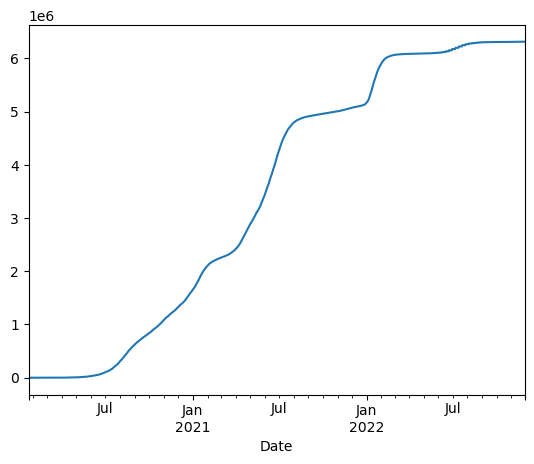

In [32]:
df_col.set_index('Date')['Cases'].plot()

También podemos titularlo 

<AxesSubplot:title={'center':'Casos de Covid19 en Colombia'}, xlabel='Date'>

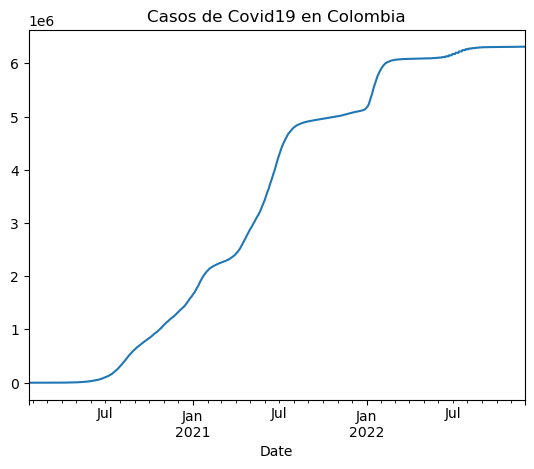

In [84]:
df_col.set_index('Date')['Cases'].plot(title= "Casos de Covid19 en Colombia")

## Podemos hacer el mismo ejercicio con Ecuador

Traemos y nombramos los datos 

In [44]:
url_ecu = 'https://api.covid19api.com/country/Ecuador/status/confirmed/live'
df_ecu = pd.read_json (url_ecu)
df_ecu

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Ecuador,EC,,,,-1.83,-78.18,0,confirmed,2020-01-22 00:00:00+00:00
1,Ecuador,EC,,,,-1.83,-78.18,0,confirmed,2020-01-23 00:00:00+00:00
2,Ecuador,EC,,,,-1.83,-78.18,0,confirmed,2020-01-24 00:00:00+00:00
3,Ecuador,EC,,,,-1.83,-78.18,0,confirmed,2020-01-25 00:00:00+00:00
4,Ecuador,EC,,,,-1.83,-78.18,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
1038,Ecuador,EC,,,,-1.83,-78.18,1009958,confirmed,2022-11-25 00:00:00+00:00
1039,Ecuador,EC,,,,-1.83,-78.18,1009958,confirmed,2022-11-26 00:00:00+00:00
1040,Ecuador,EC,,,,-1.83,-78.18,1009958,confirmed,2022-11-27 00:00:00+00:00
1041,Ecuador,EC,,,,-1.83,-78.18,1011132,confirmed,2022-11-28 00:00:00+00:00


## Conocemos los datos 

In [45]:
df_ecu.columns

Index(['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon',
       'Cases', 'Status', 'Date'],
      dtype='object')

In [46]:
df_ecu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      1043 non-null   object             
 1   CountryCode  1043 non-null   object             
 2   Province     1043 non-null   object             
 3   City         1043 non-null   object             
 4   CityCode     1043 non-null   object             
 5   Lat          1043 non-null   float64            
 6   Lon          1043 non-null   float64            
 7   Cases        1043 non-null   int64              
 8   Status       1043 non-null   object             
 9   Date         1043 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 81.6+ KB


## Realizamos el gráfico 

In [48]:
df_ecu.set_index('Date')

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status
Date,,,,,,,,,
2020-01-22 00:00:00+00:00,Ecuador,EC,,,,-1.83,-78.18,0,confirmed
2020-01-23 00:00:00+00:00,Ecuador,EC,,,,-1.83,-78.18,0,confirmed
2020-01-24 00:00:00+00:00,Ecuador,EC,,,,-1.83,-78.18,0,confirmed
2020-01-25 00:00:00+00:00,Ecuador,EC,,,,-1.83,-78.18,0,confirmed
2020-01-26 00:00:00+00:00,Ecuador,EC,,,,-1.83,-78.18,0,confirmed
...,...,...,...,...,...,...,...,...,...
2022-11-25 00:00:00+00:00,Ecuador,EC,,,,-1.83,-78.18,1009958,confirmed
2022-11-26 00:00:00+00:00,Ecuador,EC,,,,-1.83,-78.18,1009958,confirmed
2022-11-27 00:00:00+00:00,Ecuador,EC,,,,-1.83,-78.18,1009958,confirmed


In [49]:
df_ecu.set_index('Date')['Cases']

Date
2020-01-22 00:00:00+00:00          0
2020-01-23 00:00:00+00:00          0
2020-01-24 00:00:00+00:00          0
2020-01-25 00:00:00+00:00          0
2020-01-26 00:00:00+00:00          0
                              ...   
2022-11-25 00:00:00+00:00    1009958
2022-11-26 00:00:00+00:00    1009958
2022-11-27 00:00:00+00:00    1009958
2022-11-28 00:00:00+00:00    1011132
2022-11-29 00:00:00+00:00    1011132
Name: Cases, Length: 1043, dtype: int64

<AxesSubplot:xlabel='Date'>

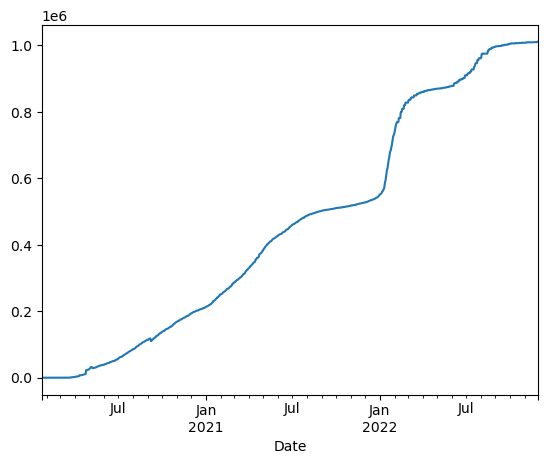

In [65]:
df_ecu.set_index('Date')['Cases'].plot()

<AxesSubplot:title={'center':'Casos de Covid19 en Ecuador'}, xlabel='Date'>

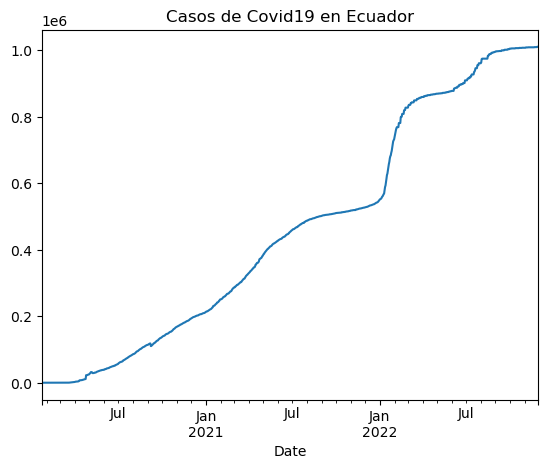

In [87]:
df_ecu.set_index('Date')['Cases'].plot(title= "Casos de Covid19 en Ecuador")

## España 

In [59]:
url_esp = 'https://api.covid19api.com/country/Spain/status/confirmed/live'
df_esp = pd.read_json (url_esp)
df_esp

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
1038,Spain,ES,,,,40.46,-3.75,13595504,confirmed,2022-11-25 00:00:00+00:00
1039,Spain,ES,,,,40.46,-3.75,13595504,confirmed,2022-11-26 00:00:00+00:00
1040,Spain,ES,,,,40.46,-3.75,13595504,confirmed,2022-11-27 00:00:00+00:00
1041,Spain,ES,,,,40.46,-3.75,13595504,confirmed,2022-11-28 00:00:00+00:00


In [60]:
df_esp.columns

Index(['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon',
       'Cases', 'Status', 'Date'],
      dtype='object')

In [61]:
df_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      1043 non-null   object             
 1   CountryCode  1043 non-null   object             
 2   Province     1043 non-null   object             
 3   City         1043 non-null   object             
 4   CityCode     1043 non-null   object             
 5   Lat          1043 non-null   float64            
 6   Lon          1043 non-null   float64            
 7   Cases        1043 non-null   int64              
 8   Status       1043 non-null   object             
 9   Date         1043 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 81.6+ KB


In [62]:
df_esp.set_index('Date')

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status
Date,,,,,,,,,
2020-01-22 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
2020-01-23 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
2020-01-24 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
2020-01-25 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
2020-01-26 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,0,confirmed
...,...,...,...,...,...,...,...,...,...
2022-11-25 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,13595504,confirmed
2022-11-26 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,13595504,confirmed
2022-11-27 00:00:00+00:00,Spain,ES,,,,40.46,-3.75,13595504,confirmed


In [64]:
df_esp.set_index('Date')['Cases']

Date
2020-01-22 00:00:00+00:00           0
2020-01-23 00:00:00+00:00           0
2020-01-24 00:00:00+00:00           0
2020-01-25 00:00:00+00:00           0
2020-01-26 00:00:00+00:00           0
                               ...   
2022-11-25 00:00:00+00:00    13595504
2022-11-26 00:00:00+00:00    13595504
2022-11-27 00:00:00+00:00    13595504
2022-11-28 00:00:00+00:00    13595504
2022-11-29 00:00:00+00:00    13595504
Name: Cases, Length: 1043, dtype: int64

<AxesSubplot:xlabel='Date'>

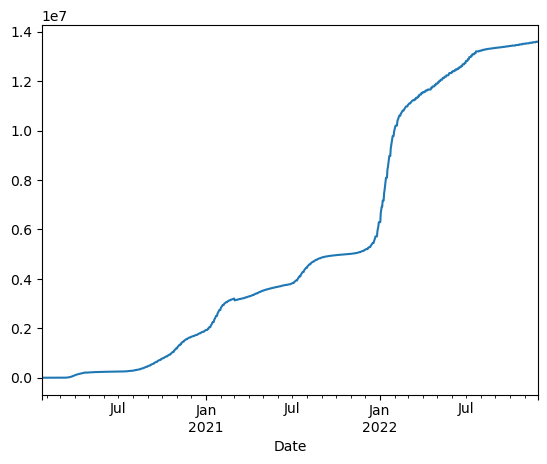

In [69]:
df_esp.set_index('Date')['Cases'].plot()

<AxesSubplot:title={'center':'Casos de Covid19 en España'}, xlabel='Date'>

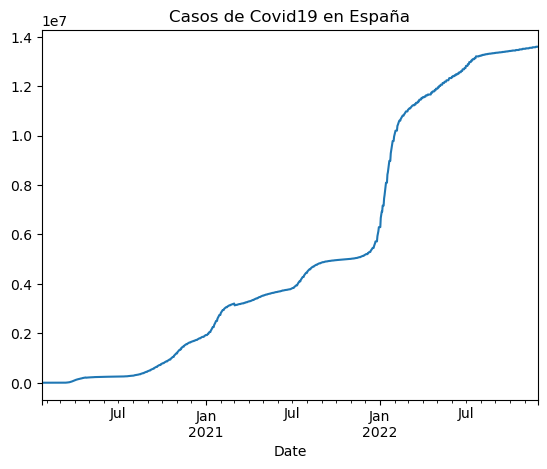

In [86]:
df_esp.set_index('Date')['Cases'].plot(title= "Casos de Covid19 en España")

## República Dominicana 

In [74]:
url_rd = 'https://api.covid19api.com/country/dominican-republic/status/confirmed/live'
df_rd = pd.read_json (url_rd)
df_rd

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed,2020-01-22 00:00:00+00:00
1,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed,2020-01-23 00:00:00+00:00
2,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed,2020-01-24 00:00:00+00:00
3,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed,2020-01-25 00:00:00+00:00
4,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
1038,Dominican Republic,DO,,,,18.74,-70.16,649150,confirmed,2022-11-25 00:00:00+00:00
1039,Dominican Republic,DO,,,,18.74,-70.16,649150,confirmed,2022-11-26 00:00:00+00:00
1040,Dominican Republic,DO,,,,18.74,-70.16,649834,confirmed,2022-11-27 00:00:00+00:00
1041,Dominican Republic,DO,,,,18.74,-70.16,649834,confirmed,2022-11-28 00:00:00+00:00


In [78]:
df_rd.columns

Index(['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon',
       'Cases', 'Status', 'Date'],
      dtype='object')

In [79]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      1043 non-null   object             
 1   CountryCode  1043 non-null   object             
 2   Province     1043 non-null   object             
 3   City         1043 non-null   object             
 4   CityCode     1043 non-null   object             
 5   Lat          1043 non-null   float64            
 6   Lon          1043 non-null   float64            
 7   Cases        1043 non-null   int64              
 8   Status       1043 non-null   object             
 9   Date         1043 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 81.6+ KB


In [80]:
df_rd.set_index('Date')

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status
Date,,,,,,,,,
2020-01-22 00:00:00+00:00,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed
2020-01-23 00:00:00+00:00,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed
2020-01-24 00:00:00+00:00,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed
2020-01-25 00:00:00+00:00,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed
2020-01-26 00:00:00+00:00,Dominican Republic,DO,,,,18.74,-70.16,0,confirmed
...,...,...,...,...,...,...,...,...,...
2022-11-25 00:00:00+00:00,Dominican Republic,DO,,,,18.74,-70.16,649150,confirmed
2022-11-26 00:00:00+00:00,Dominican Republic,DO,,,,18.74,-70.16,649150,confirmed
2022-11-27 00:00:00+00:00,Dominican Republic,DO,,,,18.74,-70.16,649834,confirmed


In [81]:
df_rd.set_index('Date')['Cases']

Date
2020-01-22 00:00:00+00:00         0
2020-01-23 00:00:00+00:00         0
2020-01-24 00:00:00+00:00         0
2020-01-25 00:00:00+00:00         0
2020-01-26 00:00:00+00:00         0
                              ...  
2022-11-25 00:00:00+00:00    649150
2022-11-26 00:00:00+00:00    649150
2022-11-27 00:00:00+00:00    649834
2022-11-28 00:00:00+00:00    649834
2022-11-29 00:00:00+00:00    650381
Name: Cases, Length: 1043, dtype: int64

<AxesSubplot:xlabel='Date'>

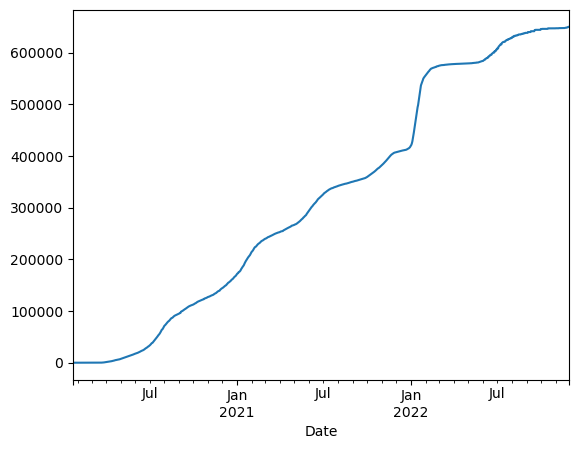

In [82]:
df_rd.set_index('Date')['Cases'].plot()

<AxesSubplot:title={'center':'Casos de Covid19 en República Dominicana'}, xlabel='Date'>

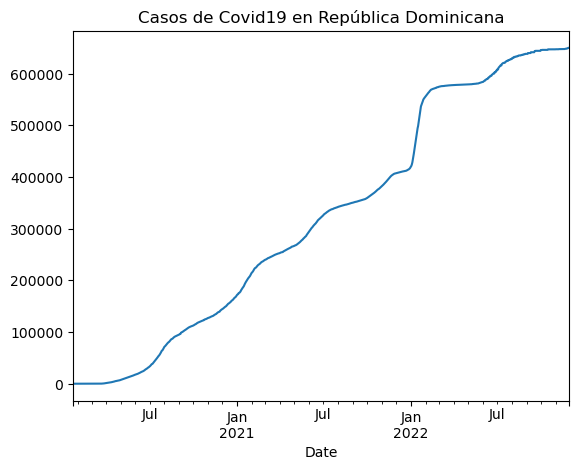

In [89]:
df_rd.set_index('Date')['Cases'].plot(title= "Casos de Covid19 en República Dominicana")